<a href="https://colab.research.google.com/github/OtusTeam/Machine-Learning/blob/main/%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C%207%3A%20Bayesian%20Learning%2C%20PyMC/33_bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
from scipy import stats
from math import factorial
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (10, 6)
SEED = 12


def num_of_successes(n, k):
    return factorial(n)/(factorial(k) * factorial(n - k))


def probability_of_success(p, n, k):
    C_kn = num_of_successes(n, k)
    return C_kn * (p**k) * (1 - p)**(n - k)



In [ ]:
probability_of_success(p=0.5, n=10, k=9)

0.009765625

Два равносильных противника играют в шахматы.
Что вероятнее:

- выиграть одну партию из двух или две партии из четырех?
- выиграть не менее двух партий из четырех или не менее трех партий из пяти? 

Ничьи во внимание не принимаются.

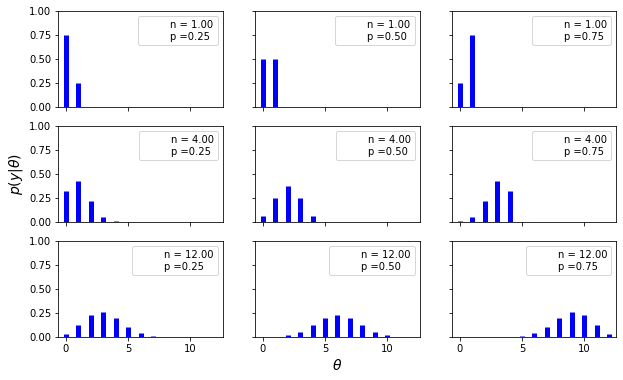

In [ ]:
n_params = [1, 4, 12]
p_params = [0.25, 0.5, 0.75]

f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        y = [probability_of_success(p=p, n=n, k=i) for i in range(n+1)]
        ax[i,j].vlines(range(0, n + 1), 0, y, colors='b', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="n = {:3.2f}\np ={:3.2f}".format(n, p), alpha=0)
        ax[i,j].legend(fontsize=10)
ax[2,1].set_xlabel('$\\theta$', fontsize=14)
ax[1,0].set_ylabel('$p(y|\\theta)$', fontsize=14);

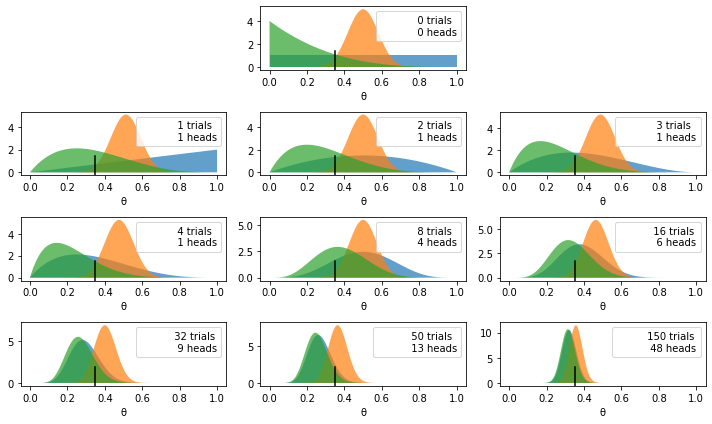

In [ ]:
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
    else:
        plt.subplot(4, 3, idx+3)
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        # это получилось после перемножения биноминального на бета
        p_theta_given_y = stats.beta.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
    plt.xlabel('θ')
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.legend()
    plt.tight_layout()